In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [139]:
df_geo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/od2017/Municipios_2017_region.shp")
df = pd.read_parquet("/home/yoshraf/projects/mestrado/data/processed/OD_2017.parquet")
df = df[["Identifica pessoa", "Coordenada X Origem", "Coordenada Y Origem"]]
df.dropna(inplace=True)
df_sample = df.sample(500, random_state=42)

In [157]:
pd.read_parquet("/home/yoshraf/projects/mestrado/data/processed/OD_2017.parquet").columns

Index(['Zona de domicílio', 'Município do domicílio', 'Coordenada X domicílio',
       'Coordenada Y domicílio', 'Identifica domicílo', 'Data da entrevista',
       'Tipo de domicílio', 'Possui água encanada?', 'A rua é pavimentada?',
       'Total de famílias no domicílio', 'Total de moradores na família',
       'Condição de moradia', 'Quantidade de banheiros',
       'Quantidade de empregados domésticos', 'Quantidade de automóveis',
       'Quantidade de motocicletas', 'Quantidade de bicicletas',
       'Critério de Classificação Econônica Brasil', 'Pontos Critério Brasil',
       'Renda familiar mensal', 'Identifica pessoa', 'Situação familiar',
       'Idade', 'Gênero', 'Estuda atualmente?', 'Grau de instrução',
       'Condição de atividade', 'Valor da renda individual',
       'Número da viagem', 'Dia da Semana', 'Total de viagens da pessoa',
       'Coordenada X Origem', 'Coordenada Y Origem', 'Coordenada X Destino',
       'Coordenada Y Destino', 'Motivo na Origem', 'Motivo no

In [140]:
gdf_origin = gpd.GeoDataFrame(df_sample, geometry=gpd.points_from_xy(df_sample["Coordenada X Origem"], df_sample["Coordenada Y Origem"]))
gdf_origin

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry
35827,00840811102,329487.0,7395895.0,POINT (329487.000 7395895.000)
35352,00840138101,333619.0,7394199.0,POINT (333619.000 7394199.000)
11292,00321738101,330520.0,7394459.0,POINT (330520.000 7394459.000)
105153,02950047102,328551.0,7369428.0,POINT (328551.000 7369428.000)
148430,04191953102,340761.0,7385258.0,POINT (340761.000 7385258.000)
...,...,...,...,...
96084,02700033101,329902.0,7386854.0,POINT (329902.000 7386854.000)
91870,02580310104,342826.0,7388117.0,POINT (342826.000 7388117.000)
154127,04370028104,350578.0,7383175.0,POINT (350578.000 7383175.000)
34682,00830885102,327367.0,7393708.0,POINT (327367.000 7393708.000)


In [141]:
df_metro = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/metro/SAD69-96_SHP_estacaometro_point.shp")
df_metro

,emt_empres,emt_situac,emt_linha,emt_nome,geometry
0,METRO,OPERANDO,VERMELHA,CORINTHIANS-ITAQUERA,POINT (349884.430 7395720.764)
1,METRO,OPERANDO,VERMELHA,ARTUR ALVIM,POINT (348502.644 7395929.882)
2,METRO,OPERANDO,VERMELHA,PATRIARCA,POINT (346777.766 7396920.334)
3,METRO,OPERANDO,VERMELHA,GUILHERMINA-ESPERANÇA,POINT (345227.021 7397116.638)
4,METRO,OPERANDO,VERMELHA,VILA MATILDE,POINT (343753.993 7396811.454)
...,...,...,...,...,...
88,METRO,OPERANDO,LILAS,CAMPO BELO,POINT (328417.735 7386993.338)
89,METRO,OPERANDO,PRATA,SÃO MATEUS,POINT (349391.936 7387987.687)
90,METRO,OPERANDO,PRATA,FAZENDA DA JUTA,POINT (348290.533 7388020.493)
91,METRO,OPERANDO,PRATA,SAPOPEMBA,POINT (346870.129 7387666.243)


In [142]:
from shapely.ops import nearest_points
from shapely.geometry import Point

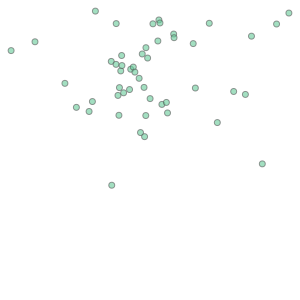

In [143]:
pts_origin

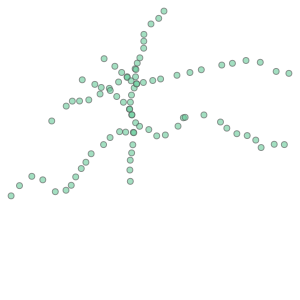

In [144]:
pts3
# pts_origin

In [145]:
pts_origin = gdf_origin.geometry.unary_union
pts_metro = df_metro.geometry.unary_union

In [150]:
# unary union of the gpd2 geomtries 
def near(point, df_ref=df_metro, pts=pts_metro, col="geometry"):
    # find the nearest point and return the corresponding Place value
    nearest = df_ref[df_ref.geometry == nearest_points(point, pts)[1]]
    return nearest[col].values[0]

def get_distance(p1, p2):
    return p1.distance(p2)
    

gdf_origin["metro_geo"] = gdf_origin["geometry"].apply(lambda row: near(row))
gdf_origin["metro_nearest"] = gdf_origin["geometry"].apply(lambda row: near(row, col="emt_nome"))
gdf_origin["dist_metro"] = get_distance(gdf_origin["geometry"], gdf_origin["metro_geo"])
gdf_origin
# gdf_origin["geometry"].apply(lambda row: near(row))

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem,geometry,metro_geo,dist_metro,metro_nearest
35827,00840811102,329487.0,7395895.0,POINT (329487.000 7395895.000),POINT (329822.886 7397312.905),1457.145872,PALMEIRAS-BARRA FUNDA
35352,00840138101,333619.0,7394199.0,POINT (333619.000 7394199.000),POINT (333355.244 7394578.873),462.461566,SÉ
11292,00321738101,330520.0,7394459.0,POINT (330520.000 7394459.000),POINT (330389.827 7394093.419),388.064931,PAULISTA
105153,02950047102,328551.0,7369428.0,POINT (328551.000 7369428.000),POINT (325687.641 7383030.236),13900.347103,LARGO TREZE
148430,04191953102,340761.0,7385258.0,POINT (340761.000 7385258.000),POINT (343146.674 7389768.553),5102.599981,CAMILO HADDAD
...,...,...,...,...,...,...,...
96084,02700033101,329902.0,7386854.0,POINT (329902.000 7386854.000),POINT (329766.241 7387986.990),1141.094152,EUCALIPTOS
91870,02580310104,342826.0,7388117.0,POINT (342826.000 7388117.000),POINT (343146.674 7389768.553),1682.396512,CAMILO HADDAD
154127,04370028104,350578.0,7383175.0,POINT (350578.000 7383175.000),POINT (349391.936 7387987.687),4956.682604,SÃO MATEUS
34682,00830885102,327367.0,7393708.0,POINT (327367.000 7393708.000),POINT (327159.125 7392717.402),1012.174079,FARIA LIMA


<AxesSubplot:>

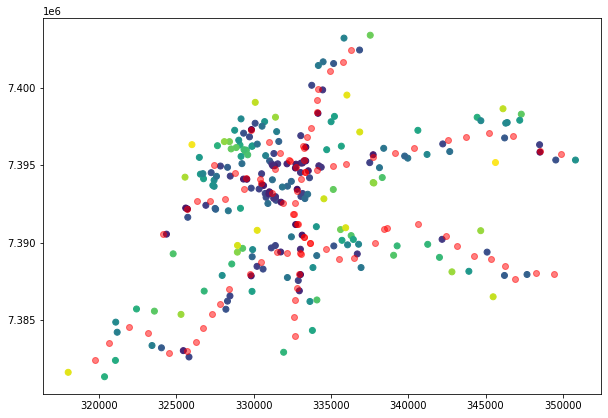

In [154]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdf_origin[gdf_origin["dist_metro"] <= 2000].plot(ax = ax, column="dist_metro")
df_metro.plot(ax = ax, alpha = 0.5, color = "red")

# 

<AxesSubplot:>

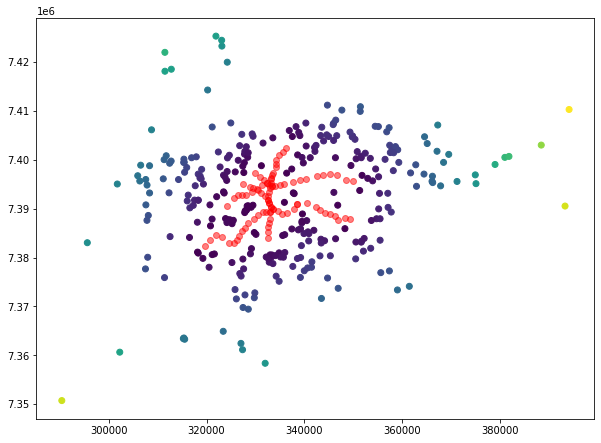

In [158]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdf_origin[gdf_origin["dist_metro"] >= 2000].plot(ax = ax, column="dist_metro")
df_metro.plot(ax = ax, alpha = 0.5, color = "red")